___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import plotly.express as px
import plotly.figure_factory as ff

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from pyclustertend import hopkins
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

#### Load Dataset

In [3]:
df_org = pd.read_csv("Mall_Customers.csv")

In [4]:
df = df_org.copy()

#### Explore Data

You can rename columns to more usable, if you need.

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.shape

(200, 5)

In [7]:
df.CustomerID.nunique()

200

In [8]:
df.drop("CustomerID", axis=1, inplace=True)

In [9]:
df.columns = ["gender", "age", "annual_income", "spending_score"]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [36]:
px.pie(df.gender.value_counts(),
       names=df.gender.value_counts().index,
       values=df.gender.value_counts().values, 
       title='Gender',
      width=400, height=400,
      color_discrete_sequence= px.colors.qualitative.Dark24)

In [69]:
fig = px.histogram(df, x="age",
                   marginal="box", # or violin, rug
                   hover_data=df.columns,
                   width=800, height=400,
                   title="Age",
                   color_discrete_sequence = ['#2BCDC1'],
                  nbins=100)
fig.show()

In [62]:
fig = px.histogram(df, x="annual_income",
                   marginal="box", # or violin, rug
                   hover_data=df.columns,
                   width=800, height=400,
                   title="Age",
                  nbins=100)
fig.show()

In [78]:
fig = px.histogram(df, x="spending_score",
                   marginal="box", # or violin, rug
                   hover_data=df.columns,
                   width=800, height=400,
                   title="Age",
                   color_discrete_sequence = ['coral'],
                  nbins=100)
fig.show()

**There are no outliers in the data. There is only one outlier in income**

In [169]:
df.groupby("gender").mean()

,age,annual_income,spending_score
gender,,,
Female,38.098,59.250,51.527
Male,39.807,62.227,48.511


In [81]:
px.scatter(df, x="age", y="spending_score")

**The clusters is not obvious according to age and spending score. Two clusters is obvious but it can be more**

In [82]:
px.scatter(df, x="annual_income", y="spending_score")

**5 clusters can be seperated obviosly according to spending score and annual income**

In [86]:
px.scatter(df, x="age", y="spending_score", color="gender")

**Gender is not seem a determining factor.**

In [87]:
fig = px.scatter_3d(df, x='age', y='annual_income', z='spending_score')
fig.show()

**In 3d (age, annual_income and spending_score) it can be 5 clusters also.**

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [261]:
df_as = df[["age","spending_score"]]

In [262]:
scaler = StandardScaler()

In [263]:
df1_scaled = scaler.fit_transform(df_as)

In [264]:
X1 = pd.DataFrame(df1_scaled, columns=df_as.columns)

**Hopkins**

In [265]:
hopkins(df_as, df_as.shape[0])

0.2812147727884301

In [266]:
hopkins(X1, X1.shape[0])

0.33786675190777976

#### *ii. Determine optimal number of clusters*

In [267]:
ssd = [] #sum squared distance

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X1)
    ssd.append(model.inertia_)

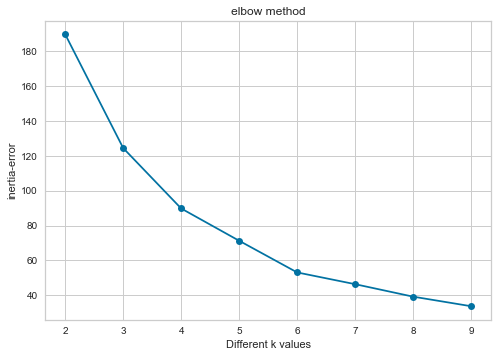

In [268]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 
plt.show()

It is seem that elbow can be in k=3 or k=4.

In [269]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,65.061
3,34.561
4,18.470
5,18.122
6,6.727
7,7.140
8,5.469


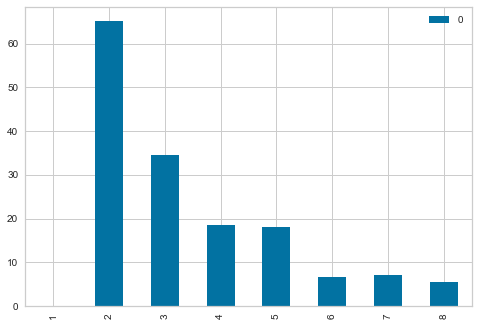

In [270]:
df_diff.plot(kind='bar');

It is seem that at k=4 sum of squared distance is less than k=3 and same as k=5

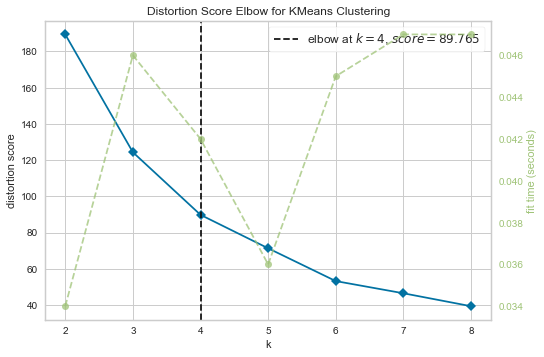

In [271]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X1)        # Fit the data to the visualizer
visualizer.show();
# score: (default- distortion )(mean of sum squared distances to centers.)

yellowbricks choose k as 4

**Silhouette analysis**

In [272]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.47212716430695223
For n_clusters=3, the silhouette score is 0.4395299000230284
For n_clusters=4, the silhouette score is 0.4383860846564479
For n_clusters=5, the silhouette score is 0.4475485887887892
For n_clusters=6, the silhouette score is 0.4531637132878646
For n_clusters=7, the silhouette score is 0.4005396447043195
For n_clusters=8, the silhouette score is 0.4138741299279621


The silhouette score of k=4 is higher than others.

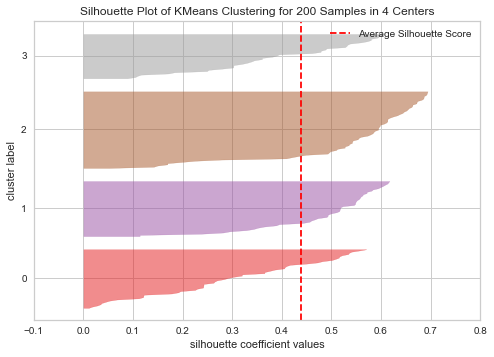

In [273]:
from yellowbrick.cluster import SilhouetteVisualizer

model4= KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model4)

visualizer.fit(X1)    # Fit the data to the visualizer
visualizer.poof();

**It is concluded that k=4 is the most suitable k.**

### Why silhouette_score is negative?

![image.png](attachment:image.png)

#### *iii. Apply K Means*

In [274]:
model = KMeans(n_clusters=4, random_state=42)
model.fit_predict(X1)

array([0, 2, 0, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 0, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 0, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2])

In [275]:
clusters = model.labels_

X1["predicted_clusters"] = clusters

In [276]:
clus_pred = X1.groupby("predicted_clusters").mean().T
clus_pred

predicted_clusters,0,1,2,3
age,-0.835,1.229,-0.614,0.628
spending_score,-0.394,-0.066,1.150,-1.367


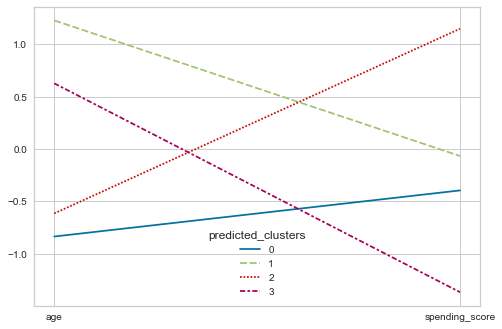

In [277]:
sns.lineplot(data = clus_pred);

#### *iv. Visualizing and Labeling All the Clusters*

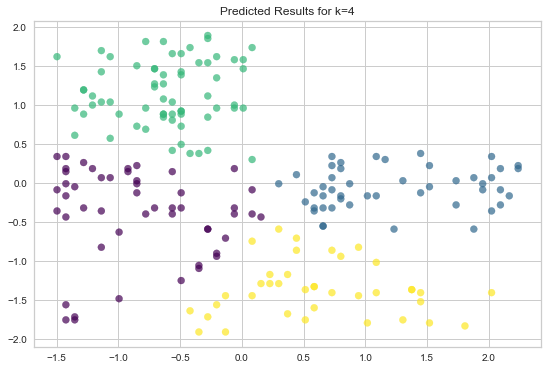

In [278]:
plt.figure(figsize = (20,6))

plt.subplot(122)
plt.scatter(X1["age"], X1["spending_score"], c = X1.predicted_clusters, cmap = "viridis", alpha=0.7)
plt.title("Predicted Results for k=4");

In [279]:
df_as["predicted_clusters"] = clusters

In [280]:
df_as_stat = df_as.groupby("predicted_clusters").agg(["count","min", "max","mean"], axis="columns")
df_as_stat.T

predicted_clusters        0      1      2      3
age            count 50.000 47.000 65.000 38.000
               min   18.000 43.000 18.000 33.000
               max   41.000 70.000 40.000 67.000
               mean  27.220 55.979 30.292 47.605
spending_score count 50.000 47.000 65.000 38.000
               min    5.000 35.000 58.000  1.000
               max   59.000 60.000 99.000 35.000
               mean  40.040 48.511 79.815 15.000

In [281]:
df_as["gender"] = df["gender"]

In [282]:
df_as.groupby("predicted_clusters").gender.value_counts().apply(lambda x: x/112 if x in [31,26,37,18] else x/88)

predicted_clusters  gender
0                   Female   0.277
                    Male     0.216
1                   Female   0.232
                    Male     0.239
2                   Female   0.330
                    Male     0.318
3                   Male     0.227
                    Female   0.161
Name: gender, dtype: float64

In [283]:
df_as.groupby("predicted_clusters").age.count()
px.pie(df_as.groupby("predicted_clusters").age.count(),
       names=df_as.groupby("predicted_clusters").age.count().index,
       values=df_as.groupby("predicted_clusters").age.count().values, 
       title='Counts of Clusters',
      width=400, height=400)

<AxesSubplot:>

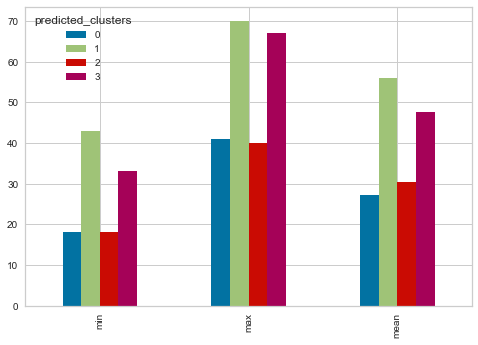

In [284]:
df_as_stat["age"].iloc[:,1:].T.plot.bar()

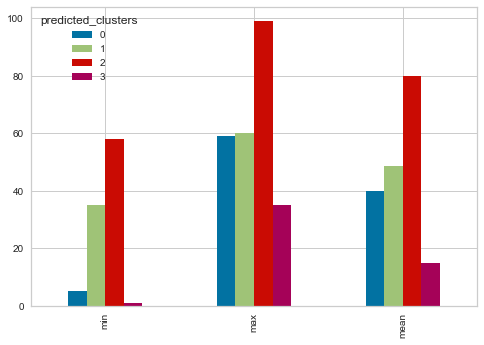

In [285]:
df_as_stat["spending_score"].iloc[:,1:].T.plot.bar();

In [286]:
fig = px.histogram(df, x=df_as["spending_score"],
                   color = df_as.predicted_clusters,
                   hover_data=df.columns,
                   width=800, height=400,
                   title="Spending Scores of Customers by Clusters",
                  nbins=150)
fig.show()

In [287]:
fig = px.histogram(df, x=df_as["age"],
                   color = df_as.predicted_clusters,
                   hover_data=df.columns,
                   width=800, height=400,
                   title="Ages of Customers by Clusters",
                  nbins=150)
fig.show()

### Conclusion of Age and Spending Score Clusters
* Each cluster has customers between 38 and 65. The distribution of clusters is balanced.
* In age, 2 clusters were formed actually.
* In age one cluster is composed of the customers whose ages are between 18 and 40 and the others are more than 35.
* In spending score clusters 1 are composed of the customers whose spending scores are between 1-35, 35-60,58-99. Spending scores of cluster 0 is between 5 and 59 and is a combination of 1 and 3.
* The spending scores of customers in cluster 2 is higher than other clusters. The customers in this cluster is very important and the continuity of these customers should be ensured with various campaigns and advertisements.
* The spending scores of the age group 18-40 is higher than the age group 40+. Campaigns and advertisements should focus on this age group.
* While the ratios of males and females (to their own numbers) are almost the same in clusters 2 and 1. But in cluster 3 ratio of males higher than females. In cluster 0 ratio of females higher than males. In this data there is no significant difference between males and females.

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [227]:
df_is = df[["annual_income","spending_score"]]

In [228]:
scaler = StandardScaler()

In [229]:
df2_scaled = scaler.fit_transform(df_is)

In [230]:
X2 = pd.DataFrame(df2_scaled, columns=df_is.columns)

**Hopkins**

In [231]:
hopkins(df_is, df_is.shape[0])

0.3038408961867799

In [232]:
hopkins(X2, X2.shape[0])

0.31260595491802134

#### *ii. Determine optimal number of clusters*

In [233]:
ssd = [] #sum squared distance

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X2)
    ssd.append(model.inertia_)

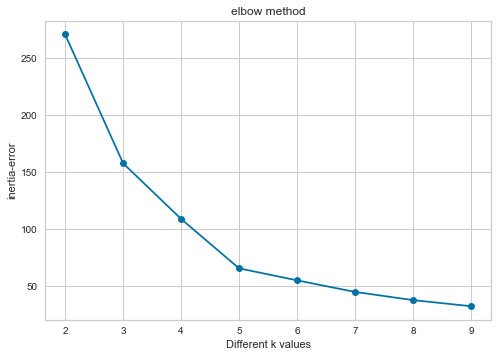

In [234]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 
plt.show()

It is seem that elbow can be in k=3 or k=4.

In [235]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,113.000
3,48.783
4,43.353
5,10.511
6,10.146
7,7.175
8,5.361


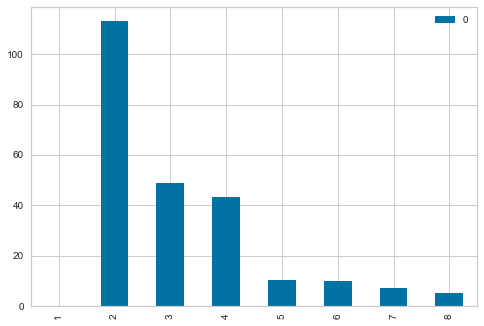

In [236]:
df_diff.plot(kind='bar');

It is seem that at k=5 sum of squared distance is less than k=4 and same as k=6

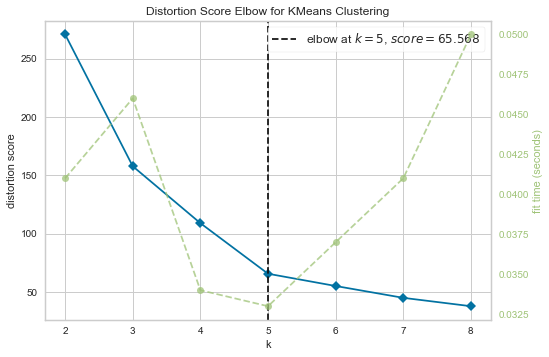

In [237]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X2)        # Fit the data to the visualizer
visualizer.show();
# score: (default- distortion )(mean of sum squared distances to centers.)

yellowbricks choose k as 5

**Silhouette analysis**

In [238]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.1152681280427533
For n_clusters=3, the silhouette score is 0.06854078080749361
For n_clusters=4, the silhouette score is 0.061238755040905424
For n_clusters=5, the silhouette score is -0.056434710556767256
For n_clusters=6, the silhouette score is -0.08123612765264429
For n_clusters=7, the silhouette score is -0.03776981373630692
For n_clusters=8, the silhouette score is -0.06764003134432177


The silhouette scores are very close to each other.

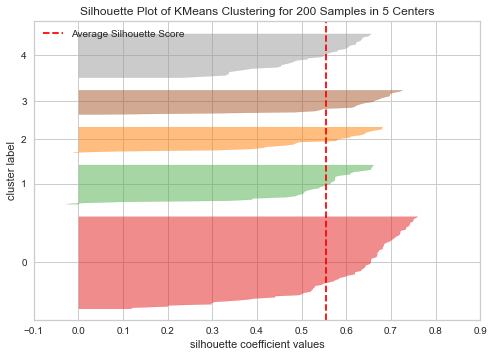

In [240]:
from yellowbrick.cluster import SilhouetteVisualizer

model4= KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model4)

visualizer.fit(X2)    # Fit the data to the visualizer
visualizer.poof();

**It is concluded that k=5 is the most suitable cluster number.**

#### *iii. Apply K Means*

In [241]:
model = KMeans(n_clusters=5, random_state=42)
model.fit_predict(X2)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [242]:
clusters = model.labels_

X2["predicted_clusters"] = clusters

In [243]:
clus_pred = X2.groupby("predicted_clusters").mean().T
clus_pred

predicted_clusters,0,1,2,3,4
annual_income,-0.201,1.055,-1.308,-1.330,0.992
spending_score,-0.026,-1.284,-1.137,1.132,1.240


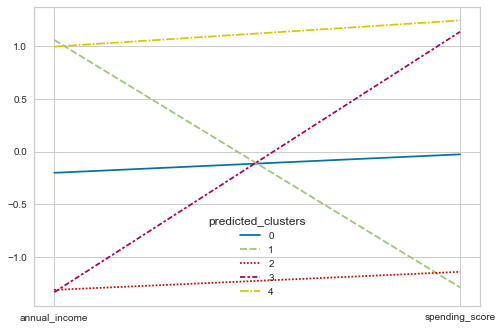

In [244]:
sns.lineplot(data = clus_pred);

#### *iv. Visualizing and Labeling All the Clusters*

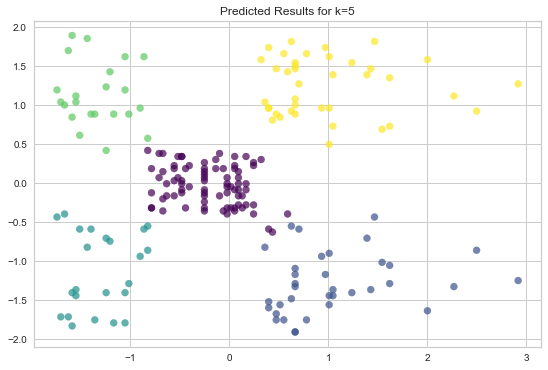

In [245]:
plt.figure(figsize = (20,6))

plt.subplot(122)
plt.scatter(X2["annual_income"], X2["spending_score"], c = X2.predicted_clusters, cmap = "viridis", alpha=0.7)
plt.title("Predicted Results for k=5");

In [247]:
df_is["predicted_clusters"] = clusters

In [248]:
df_is_stat = df_is.groupby("predicted_clusters").agg(["count","min", "max","mean"], axis="columns")
df_is_stat.T

predicted_clusters        0       1      2      3       4
annual_income  count 81.000  35.000 23.000 22.000  39.000
               min   39.000  70.000 15.000 15.000  69.000
               max   76.000 137.000 39.000 39.000 137.000
               mean  55.296  88.200 26.304 25.727  86.538
spending_score count 81.000  35.000 23.000 22.000  39.000
               min   34.000   1.000  3.000 61.000  63.000
               max   61.000  39.000 40.000 99.000  97.000
               mean  49.519  17.114 20.913 79.364  82.128

In [249]:
df_is["gender"] = df["gender"]

In [326]:
df_is.groupby("predicted_clusters").gender.value_counts().apply(lambda x: x/112 if x in [48,16,14,13,21] else x/88)

predicted_clusters  gender
0                   Female   0.429
                    Male     0.375
1                   Male     0.216
                    Female   0.143
2                   Female   0.125
                    Male     0.102
3                   Female   0.116
                    Male     0.102
4                   Female   0.188
                    Male     0.205
Name: gender, dtype: float64

In [253]:
df_is.groupby("predicted_clusters").annual_income.count()
px.pie(df_is.groupby("predicted_clusters").annual_income.count(),
       names=df_is.groupby("predicted_clusters").annual_income.count().index,
       values=df_is.groupby("predicted_clusters").annual_income.count().values, 
       title='Counts of Clusters',
      width=400, height=400)

<AxesSubplot:>

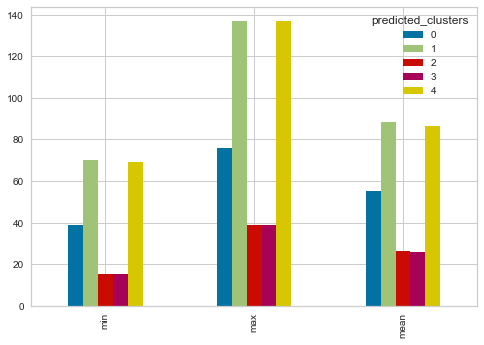

In [254]:
df_is_stat["annual_income"].iloc[:,1:].T.plot.bar()

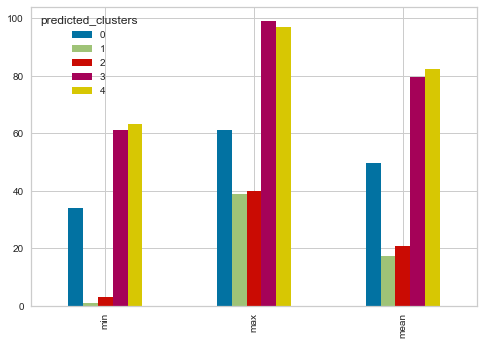

In [255]:
df_is_stat["spending_score"].iloc[:,1:].T.plot.bar();

In [256]:
fig = px.histogram(df, x=df_is["spending_score"],
                   color = df_is.predicted_clusters,
                   hover_data=df.columns,
                   width=800, height=400,
                   title="Spending Scores of Customers by Clusters",
                  nbins=150)
fig.show()

In [258]:
fig = px.histogram(df, x=df_is["annual_income"],
                   color = df_is.predicted_clusters,
                   hover_data=df.columns,
                   width=800, height=400,
                   title="Annual income of Customers by Clusters",
                  nbins=150)
fig.show()

### Conclusion of Monthly Income and Spending Score Clusters
* The rate of the cluster 0 is 40% and higher than other clusters. 
* Cluster 
          4-  high income   (mean 87 range[69,137])  high spending score   (mean 82 range[63,97])
          1-  high income   (mean 88 range[70,137])  low spending score    (mean 17 range[1,39])
          2-  low income    (mean 26 range[15,39])   low spending score    (mean 20 range[3,40])
          3-  low income    (mean 26 range[15,39])   high spending score   (mean 79 range[61,99])
          0-  medium income (mean 55 range[39,76])   medium spending score (mean 50 range[34,61])
* The spending scores of customers in cluster 4 and 3 is higher than other clusters. The customers in these cluster is very important and the continuity of these customers should be ensured with various campaigns and advertisements.
* Medium cluster is also important. Almost half of customers are in this cluster. Their spending scores should be increased.
* The ratio of females and males are almost same in clusters 3 and 4. But female ratio in the cluster 0 is higher than males. 

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [289]:
X1 = X1.iloc[:,:-1]

In [290]:
hc_ward = linkage(y = X1, method = "ward")
hc_complete = linkage(X1, "complete")
hc_average = linkage(X1, "average")
hc_single = linkage(X1, "single")

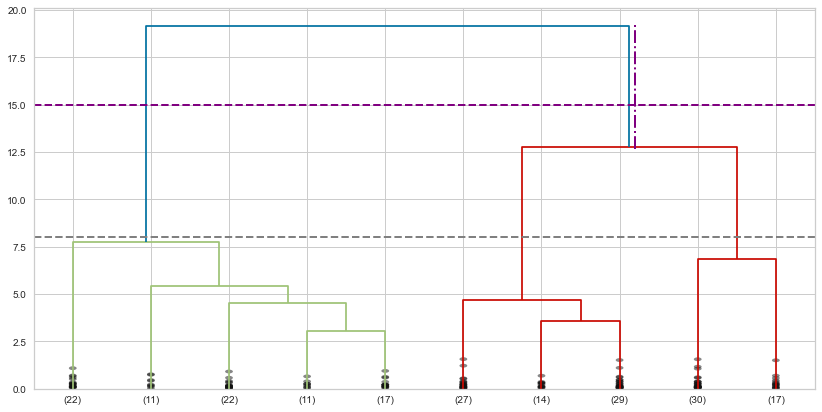

In [314]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward,
           truncate_mode = "lastp",
           p = 10,
           show_contracted = True,
           distance_sort=True,
           leaf_font_size = 10)
plt.axhline(y=15, c='purple', lw=2, linestyle='dashed')
plt.axhline(y=8, c='gray', lw=2, linestyle='dashed')
plt.axvline(x=77, ymin=0.63, ymax=0.96,c='purple', lw=2, linestyle='-.');

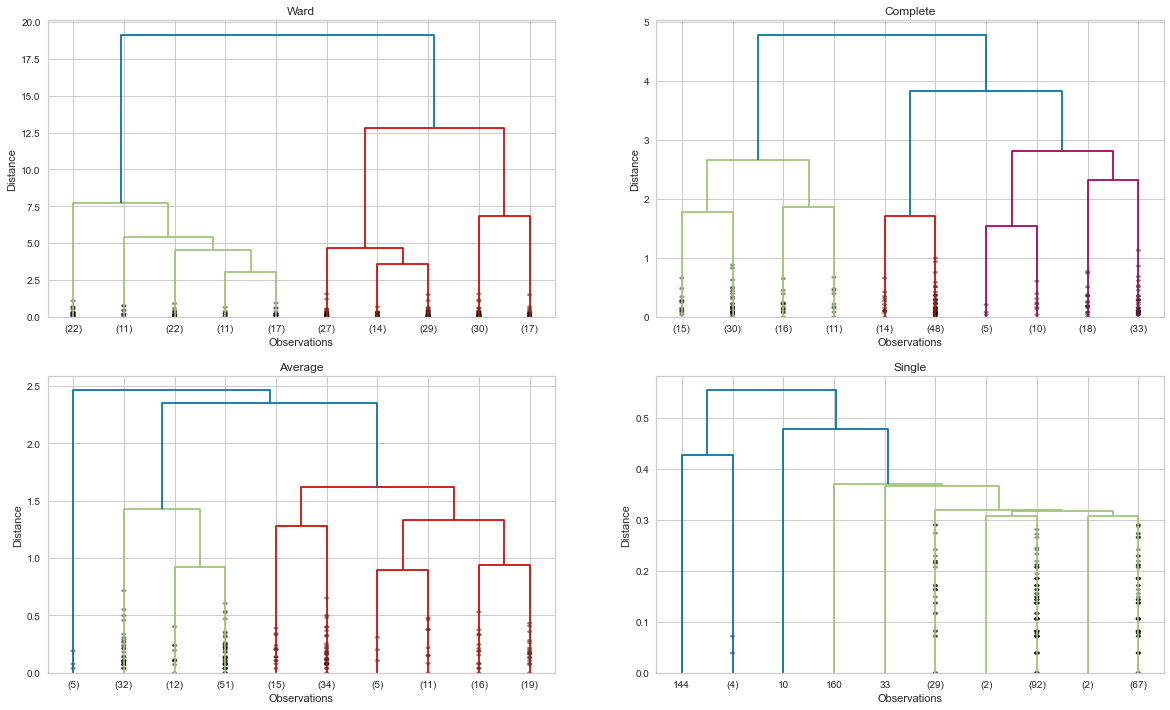

In [292]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

In [294]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X1)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X1, model.labels_)}')

Silhouette Score for 2 clusters: 0.41449964268829986
Silhouette Score for 3 clusters: 0.4166414852049989
Silhouette Score for 4 clusters: 0.38927004893647266
Silhouette Score for 5 clusters: 0.3764554127969014
Silhouette Score for 6 clusters: 0.3990690566558255
Silhouette Score for 7 clusters: 0.358604678369238
Silhouette Score for 8 clusters: 0.361081283331325
Silhouette Score for 9 clusters: 0.3659083749836485


According to the dendogram, cluster number can be 2 or 3. 

### Clustering based on Annual Income and Spending Score- x2

In [316]:
X2 = X2.iloc[:,:-1]

In [318]:
hc_ward = linkage(y = X2, method = "ward")
hc_complete = linkage(X2, "complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

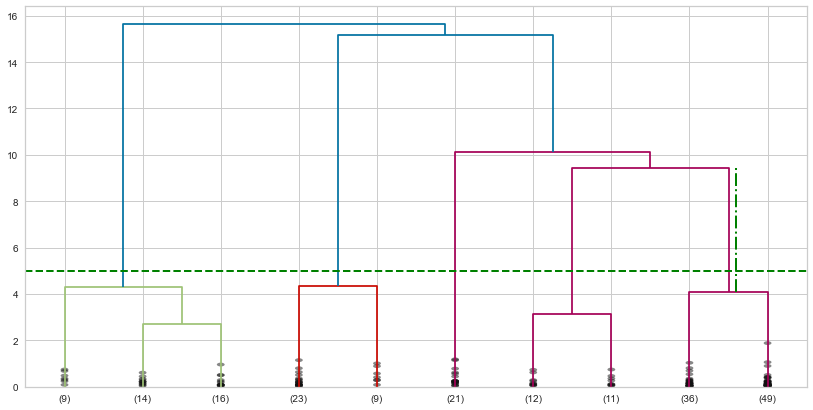

In [322]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward,
           truncate_mode = "lastp",
           p = 10,
           show_contracted = True,
           distance_sort=True,
           leaf_font_size = 10)
plt.axhline(y=5, c='green', lw=2, linestyle='dashed')
plt.axvline(x=91, ymin=0.25, ymax=0.58,c='green', lw=2, linestyle='-.');

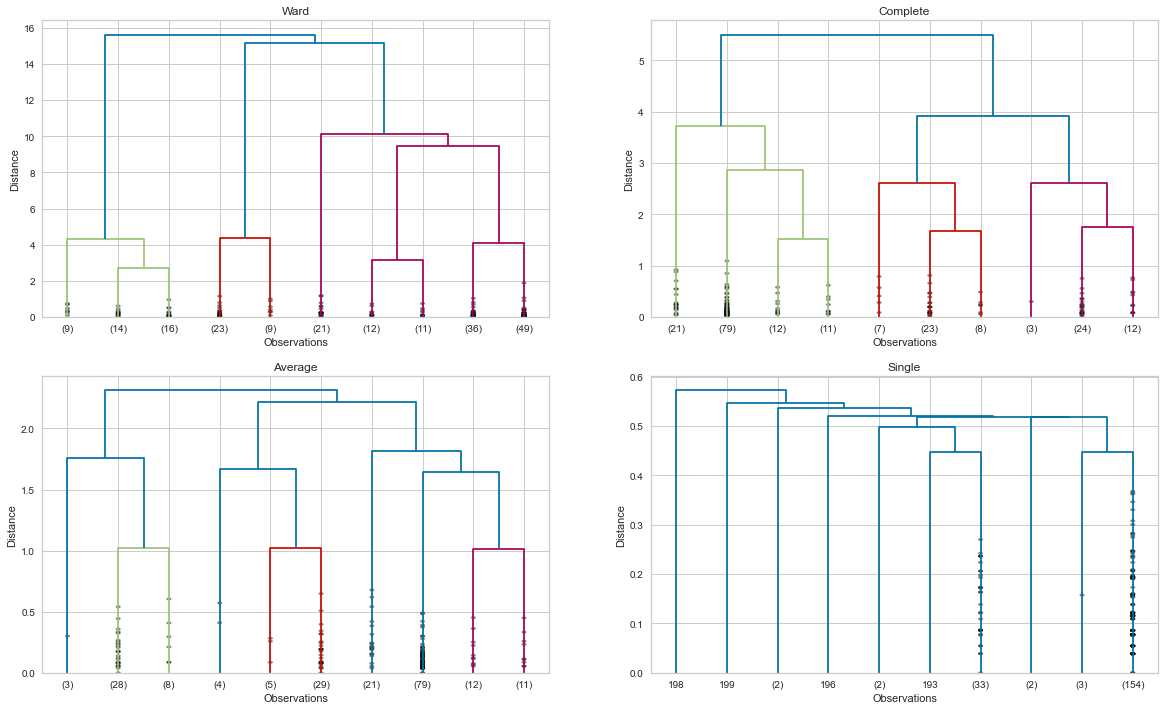

In [323]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

In [325]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X2, model.labels_)}')

Silhouette Score for 2 clusters: 0.3842337621772661
Silhouette Score for 3 clusters: 0.4610481446570447
Silhouette Score for 4 clusters: 0.4925507715349343
Silhouette Score for 5 clusters: 0.5538089226688662
Silhouette Score for 6 clusters: 0.5386761871036926
Silhouette Score for 7 clusters: 0.5197949293475769
Silhouette Score for 8 clusters: 0.4308617778221774
Silhouette Score for 9 clusters: 0.4376899775815414


According to the dendogram, cluster number can be 5. 

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [328]:
final_model_as1 = AgglomerativeClustering(n_clusters=2, affinity = "euclidean", linkage = "complete")
clusters = final_model_as1.fit_predict(X1)

In [329]:
X1as2 = X1.copy()

In [330]:
X1as2["predicted_clusters"] = clusters
X1as2["predicted_clusters"].value_counts()

0    128
1     72
Name: predicted_clusters, dtype: int64

In [336]:
final_model_as2 = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "complete")
clusters = final_model_as2.fit_predict(X1)

In [337]:
X1as3 = X1.copy()

In [338]:
X1as3["predicted_clusters"] = clusters
X1as3["predicted_clusters"].value_counts()

1    72
0    66
2    62
Name: predicted_clusters, dtype: int64

In [340]:
df_as["predicted_clusters_h"] = clusters

In [344]:
df_as.groupby("predicted_clusters_h")["age","spending_score"].agg(["count","min", "max","mean"], axis="columns").T

predicted_clusters_h      0      1      2
age            count 66.000 72.000 62.000
               min   18.000 41.000 18.000
               max   45.000 70.000 40.000
               mean  29.667 54.542 30.403
spending_score count 66.000 72.000 62.000
               min    1.000  3.000 60.000
               max   66.000 60.000 99.000
               mean  37.455 35.681 80.629

#### Annual Income and Spending Score- x2

In [345]:
final_model_is = AgglomerativeClustering(n_clusters=5, affinity = "euclidean", linkage = "complete")
clusters = final_model_is.fit_predict(X2)

In [346]:
df_is["predicted_clusters_h"] = clusters

In [347]:
df_is.groupby("predicted_clusters_h")["annual_income","spending_score"].agg(["count","min", "max","mean"], axis="columns").T

predicted_clusters_h       0      1       2      3      4
annual_income  count  39.000 23.000  38.000 21.000 79.000
               min    69.000 15.000  70.000 15.000 39.000
               max   137.000 39.000 137.000 38.000 69.000
               mean   86.538 26.304  87.000 25.095 54.418
spending_score count  39.000 23.000  38.000 21.000 79.000
               min    63.000  3.000   1.000 61.000 40.000
               max    97.000 40.000  40.000 99.000 65.000
               mean   82.128 20.913  18.632 80.048 50.215

### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

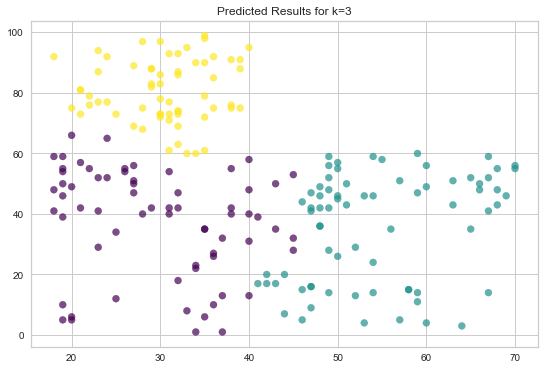

In [349]:
plt.figure(figsize = (20,6))

plt.subplot(122)
plt.scatter(df_as["age"], df_as["spending_score"], c = df_as.predicted_clusters_h, cmap = "viridis", alpha=0.7)
plt.title("Predicted Results for k=3");

#### Annual Income and Spending Score- x2

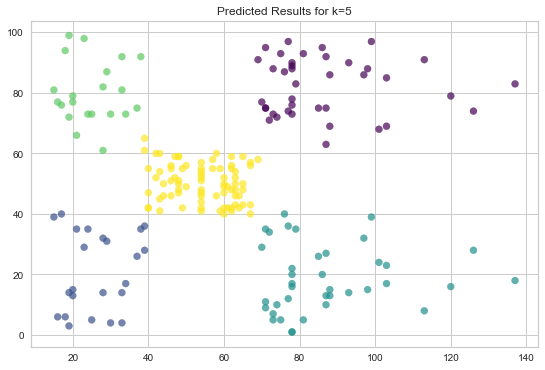

In [348]:
plt.figure(figsize = (20,6))

plt.subplot(122)
plt.scatter(df_is["annual_income"], df_is["spending_score"], c = df_is.predicted_clusters_h, cmap = "viridis", alpha=0.7)
plt.title("Predicted Results for k=5");

#### Interpretation based on Age and Spending Score- x1

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___